# Exploratory Data Analysis for UofT targets Dataset

In [1]:
#!pip install libraries
#!pip install seaborn
#!pip install bioinfokit
#!pip install statsmodels
#!pip install scikit_posthocs
#!pip install pingouin

In [2]:
#Libraries 
import pandas as targets 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from sklearn.linear_model import LinearRegression

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

import scipy
from scipy import stats

from bioinfokit.analys import stat


# Getting to Know Dataset

Importing and checking columns, rows, datatype, and dimension.

In [3]:
#Import csv file as pandas dataframe
targets = targets.read_csv('targets.simple.csv')
targets.head()

C:\Users\amych\AppData\Local\Temp\ipykernel_22116\299639716.py:2: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  targets = targets.read_csv('targets.simple.csv')


,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,first_seen,last_seen
0,acf-0015776c77e8f7264f3bee87b48ec35b03993758,Person,Bulatov Igor Borisovich,Булатов Игорь Борисович,1983-04-04,NaN,NaN,NaN,NaN,NaN,NaN,ACF List of bribetakers and warmongers,2023-02-15 12:13:21,2023-02-23 00:16:29
1,acf-003139ddd987bb7665e60de45178013ce9ec36f7,Person,Stepanenko Igor Borisovich,Степаненко Игорь Борисович,1963-07-27,NaN,NaN,NaN,NaN,NaN,NaN,ACF List of bribetakers and warmongers,2023-02-15 12:13:21,2023-02-23 00:16:29
2,acf-004a0ec86ee0828673f52ed84962c89d8598e3b1,Person,Natarkina Olga Iurevna,Натаркина Ольга Юрьевна,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACF List of bribetakers and warmongers,2023-02-15 12:13:21,2023-02-23 00:16:29
3,acf-00504258e38cc160450bf46eb0706eeec70f0c2b,Person,Shaikhutdinov Roman Alexandrovich,Шайхутдинов Роман Александрович,1974-08-28,NaN,NaN,NaN,NaN,NaN,NaN,ACF List of bribetakers and warmongers,2023-02-15 12:13:21,2023-02-23 00:16:29
4,acf-0065f928c3e02299e4615eddd5adc976f67777b0,Person,Kravchuk Svetlana Georgievna,Кравчук Светлана Георгиевна,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACF List of bribetakers and warmongers,2023-02-15 12:13:21,2023-02-23 00:16:29


In [4]:
#Exploring data characteristics
targets.describe()

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,first_seen,last_seen
count,269946,269946,269946,165248,168921,247148,26768,200483,41150,4999,10061,269946,269945,269945
unique,269869,8,262920,154854,29988,2192,15749,200312,13817,4893,10024,1917,1347,43
top,Q27867848,Person,Person,Locky,1963,ru,"Charlotte, NORTH CAROLINA",невідомо,"""""",+442072193000,congreso@congreso.gob.gt,Wikidata;Wikidata Politically Exposed Persons,2021-07-26 11:55:45,2023-02-23 00:53:53
freq,2,226328,1774,7037,764,34769,807,74,2638,26,13,100769,79625,134574


In [5]:
for col in targets.columns: 
    print(col) 

id
schema
name
aliases
birth_date
countries
addresses
identifiers
sanctions
phones
emails
dataset
first_seen
last_seen


In [6]:
#Checking data types in dataframe
col_types = targets.dtypes
col_types

id             object
schema         object
name           object
aliases        object
birth_date     object
countries      object
addresses      object
identifiers    object
sanctions      object
phones         object
emails         object
dataset        object
first_seen     object
last_seen      object
dtype: object

In [7]:
#Checking dimensions of the dataframe
dims = targets.shape
dims

(269946, 14)

In [8]:
#Unique value counts for id
targets['id'].value_counts()

Q27867848                                  2
Q31284132                                  2
Q21179358                                  2
Q31207215                                  2
Q27058375                                  2
                                          ..
Q116056267                                 1
Q116056268                                 1
Q116056269                                 1
Q116056270                                 1
zafic-58-mahmoud-mohammad-ahmad-bahaziq    1
Name: id, Length: 269869, dtype: int64

In [9]:
#Unique value counts for schema
targets['schema'].value_counts()

Person          226328
Security         17994
CryptoWallet     10367
Company           6099
LegalEntity       4529
Organization      3633
Vessel             698
Airplane           298
Name: schema, dtype: int64

In [10]:
#Unique value counts for name
targets['name'].value_counts()

Person                                                                                                                                  1774
Облигации федерального займа с постоянным купонным доходом                                                                                52
Биржевые облигации документарные процентные неконвертируемые на предъявителя с обязательным централизованным хранением серии 001P-01      44
Биржевые облигации документарные процентные неконвертируемые на предъявителя с обязательным централизованным хранением серии БО-П01       37
Биржевые облигации процентные неконвертируемые бездокументарные с централизованным учетом прав серии 001P-01                              35
                                                                                                                                        ... 
Katsuhiko Takeuchi                                                                                                                         1
TAKEUCHI Yuzu

In [11]:
#Unique value counts for aliases
targets['aliases'].value_counts()

Locky                                                                                                                                                                                                                  7037
NotNevada                                                                                                                                                                                                              2802
Netwalker (Mailto)                                                                                                                                                                                                       66
SamSam                                                                                                                                                                                                                   48
Ryuk                                                                                                                    

In [12]:
#Unique value counts for birth_date
targets['birth_date'].value_counts()

1963                     764
1950                     760
1962                     748
1956                     621
1960                     621
                        ... 
1988-08-13                 1
1928-04-09                 1
1928-11-03                 1
1999-09-27                 1
1961-10-16;1963-11-08      1
Name: birth_date, Length: 29988, dtype: int64

In [13]:
#Unique value counts for countries
targets['countries'].value_counts()

ru                   34769
us                   29324
de                    8626
cn                    7879
fr                    7304
                     ...  
bd;us                    1
dz;fr;ir                 1
cn;kr;nl;pk;sg;tr        1
ae;gy                    1
iq;ps                    1
Name: countries, Length: 2192, dtype: int64

In [14]:
#Unique value counts for identifiers
targets['identifiers'].value_counts()

невідомо                                   74
Невідомо                                   38
1149102012620;9111000450                    8
1057746595367;7704552473                    4
0440273961                                  3
                                           ..
Q17220553                                   1
Q17220804                                   1
Q17221291                                   1
Q17221388                                   1
National Identification Number, 0075258     1
Name: identifiers, Length: 200312, dtype: int64

In [15]:
#Unique value counts for sanctions
targets['sanctions'].value_counts()

""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [16]:
#Unique value counts for phones
targets['phones'].value_counts()

+442072193000    26
+67728520        23
+74956968800     12
+3225501260       8
+3225501280       5
                 ..
+243815050147     1
+243810184701     1
+243994400049     1
+243991929587     1
+12022254016      1
Name: phones, Length: 4893, dtype: int64

In [17]:
#Unique value counts for emails
targets['emails'].value_counts()

congreso@congreso.gob.gt       13
gp_ps@ps.parlamento.pt          3
dynastygroup@myanmar.com.mm     3
ps-smi@mil.ru                   3
BKO@bitriver.farm               3
                               ..
liselott.blixt@ft.dk            1
thomas.danielsen@ft.dk          1
Troels.Ravn@ft.dk               1
aadu.must@riigikogu.ee          1
Misko@house.gov.by              1
Name: emails, Length: 10024, dtype: int64

In [18]:
#Unique value counts for first_seen
targets['first_seen'].value_counts()

2021-07-26 11:55:45    79625
2022-12-28 00:55:07    47413
2022-12-30 18:28:00    37702
2022-11-17 10:16:52    15645
2022-07-12 12:01:58     8200
                       ...  
2023-01-23 18:12:23        1
2023-02-08 16:36:51        1
2023-02-01 12:07:24        1
2023-02-02 12:08:11        1
2023-02-09 18:45:56        1
Name: first_seen, Length: 1347, dtype: int64

In [19]:
#Unique value counts for last_seen
targets['last_seen'].value_counts()

2023-02-23 00:53:53    134574
2022-04-25 12:21:45     24615
2023-01-12 18:16:16     17994
2023-02-22 14:26:42     16533
2023-02-23 00:16:29     14728
2023-02-23 00:44:50     13821
2023-02-23 00:44:49      8294
2023-02-23 00:37:46      7741
2023-02-23 00:19:19      7374
2023-02-23 00:11:48      6548
2023-02-23 00:37:41      5310
2023-02-23 00:19:20      1729
2023-02-23 00:13:17      1554
2023-02-23 00:53:52      1117
2023-02-23 00:13:18      1017
2023-02-23 00:08:16       981
2023-02-23 00:06:20       901
2023-02-23 00:53:51       683
2023-02-23 00:11:27       511
2023-02-23 00:06:29       502
2023-02-23 00:05:37       445
2023-02-23 00:07:50       371
2023-02-23 00:06:15       371
2022-08-23 18:16:59       358
2023-02-23 00:05:43       343
2023-02-23 00:37:42       331
2023-02-23 00:11:44       271
2023-02-23 00:05:40       241
2023-02-23 00:05:44       169
2023-02-23 00:16:10       142
2023-02-23 00:07:05        76
2023-02-23 00:11:47        62
2023-02-23 00:16:11        54
2023-02-23

# Data Cleaning

Cleaning targets dataset using tidy data principles.

In [20]:
#Check for duplicates of the same values across attributes listed
dups = targets.duplicated(['id'])
targets[dups]

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,first_seen,last_seen
79414,Q111291907,Person,Joel Biggie Matiza,"Biggie J. Matiza;Matiza, Biggie J.",1960-08-17,zw,NaN,ZA557399,Ordinance of 19 March 2002 on measures agains...,NaN,NaN,Canadian Special Economic Measures Act Sanctio...,2021-07-26 11:55:45,2023-02-23 00:06:20
79611,Q111313831,Person,Dzikamai Calisto Mavhaire,"Mavhaire, Dzikamai Calisto",NaN,zw,NaN,NaN,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
79614,Q111313856,Person,Tsitsi MUZENDA,"MUZENDA, Tsitsi;Muzenda, Tsitsi V.;Tsitsi Muze...",1922-08-22,zw,NaN,NaN,Program - SDN List - Block - Unknown;ZIMBABWE;...,NaN,NaN,Canadian Special Economic Measures Act Sanctio...,2021-07-26 11:55:45,2023-02-23 00:44:50
81694,Q111523667,Person,María Verónica Muñoz Parra,Muñoz Parra María Verónica,NaN,mx,NaN,NaN,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
100200,Q13534583,Person,"Sardar Ayaz Sadiq, Speaker National Assembly","Sardar Ayaz Sadiq;Садик, Сардар;سردار اياز صاد...",1954-10-17,pk,NaN,Q13534583,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199453,Q6959189,Person,Nahapet Gevorgyan,Нагапет Багратович Геворгян;Նահապետ Բագրատի Գե...,1957-06-28,am,NaN,Q6959189,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
201884,Q7281459,Person,Radnaasümbereliin Gonchigdorj,GONCHIGDORJ Radnasumberel;Radnaasumbereliyn Go...,1953,mn,NaN,Q7281459,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
212807,Q9131042,Person,Nyamaagiin Enkhbold,ENKHBOLD Nyamaa;Nyamaa ENKHBOLD;Нямаагийн Энхб...,1957-01-06,mn,NaN,Q9131042,NaN,NaN,enkhbold@parliament.mn,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45
213388,Q9190484,Person,朝克,NaN,1957,cn,NaN,Q9190484,NaN,NaN,NaN,Every Politician,2021-07-26 11:55:45,2022-04-25 12:21:45


In [21]:
targets.isnull().values.any().sum()

1

In [22]:
#Calculate the number of missing values in each column:
targets.isnull().sum()

id                  0
schema              0
name                0
aliases        104698
birth_date     101025
countries       22798
addresses      243178
identifiers     69463
sanctions      228796
phones         264947
emails         259885
dataset             0
first_seen          1
last_seen           1
dtype: int64

<AxesSubplot:>

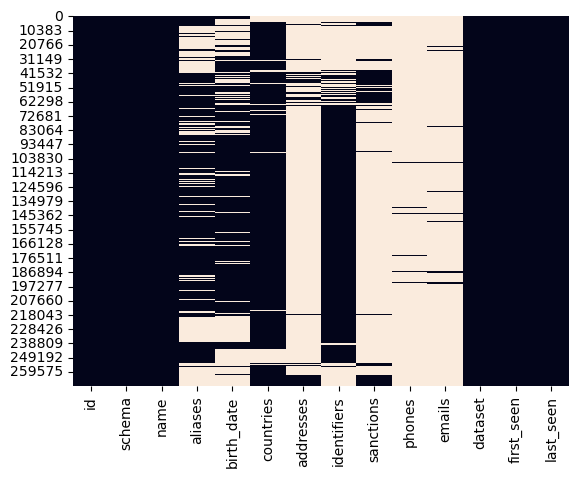

In [23]:
#Use a heatmap to visualize missing data
sns.heatmap(targets.isnull(), cbar=False)

In [24]:
#Exporting cleaned data
#iabetes = targets.drop(['log_Age', 'log_Insulin'], axis=1)
targets.to_csv("UofT_targets_cleaned.csv", index=False)